Importing basic libraries

In [1]:
import palantir
import scanpy as sc
import pandas as pd
import anndata
import os
import time

# Plotting
import matplotlib
import matplotlib.pyplot as plt


Setting up the environment

In [2]:
# Execution start begin with timing
start_time = time.time()
sc.settings.verbosity = 3
fig_res = 150
sc.set_figure_params(dpi = fig_res, frameon = 0)

# MIK67 = Ki67, TNSFRSF19 = TROY
gastric_stem = ['LGR5', 'ASCL2', 'CD44', 'STMN1', 'BMI1', 'LRIG1', 'TNFRSF19', 'SOX2']
intestinal_stem = ['SMOC2', 'OLFM4']
stem = gastric_stem + intestinal_stem # Currently, this is an overall list of all the markers used to look at any stem cells in either the intestines or the stomach.

inspect_stem = ['leiden', 'MKI67', 'LGR5', 'ASCL2', 'CD44', 'SMOC2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'BHLHA15', 'TNFRSF19', 'SOX2', 'leiden', 'Localization']
inspect_stem_duo = ['leiden', 'MKI67', 'LGR5', 'ASCL2', 'CD44', 'SMOC2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'leiden', 'Localization']

inspect_stem_gast = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'leiden', 'Localization']

gastric_markers = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'BHLHA15', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'MUC6', 'TFF2', 'MUC5AC', 'GKN2', 'TFF1', 'GHRL', 'AQP5', 'MUC1', 'leiden', 'Localization']
duodenal_markers = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'BHLHA15', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'MUC6', 'MUC2', 'TFF3', 'GHRL', 'AQP5', 'MUC1', 'ANPEP', 'LYZ', 'leiden', 'Localization']

global_res = 0.5

In [3]:
path = 'C:/Work cache/py_projs/scRNAseq_AGR2/project data cache/testing integration with separation and the stem cells part 2/saved files/cellrank_test/'
pat_ant = sc.read_h5ad(path + 'ant_agr2_organoid.h5ad')

In [4]:
ad = pat_ant

In [5]:
sc.tl.tsne(ad)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


C:\anaconda_envs\spyder\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:51)


In [6]:
dm_res = palantir.utils.run_diffusion_maps(ad, n_components = 50, pca_key = 'X_pca')

computing neighbors


C:\anaconda_envs\spyder\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)


In [7]:
ms_data = palantir.utils.determine_multiscale_space(ad)

In [8]:
sc.pp.neighbors(ad, n_neighbors = 100)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [9]:
sc.tl.leiden(ad, resolution = 1.8)

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:11)


In [17]:
sc.tl.louvain(ad, resolution = 1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:15)


In [12]:
sc.tl.paga(ad)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)


--> added 'pos', the PAGA positions (adata.uns['paga'])


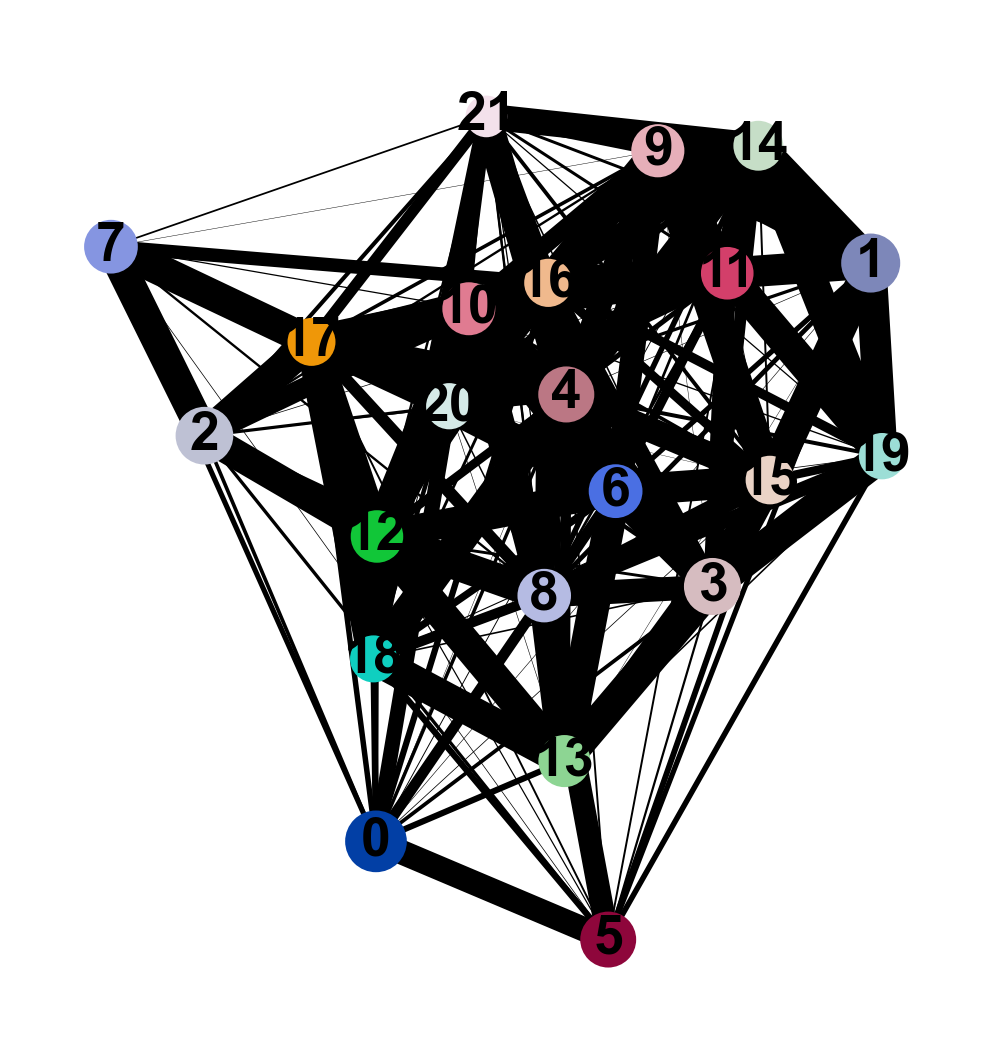

In [13]:
sc.pl.paga(ad)

In [14]:
sc.tl.umap(ad, init_pos = 'paga')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


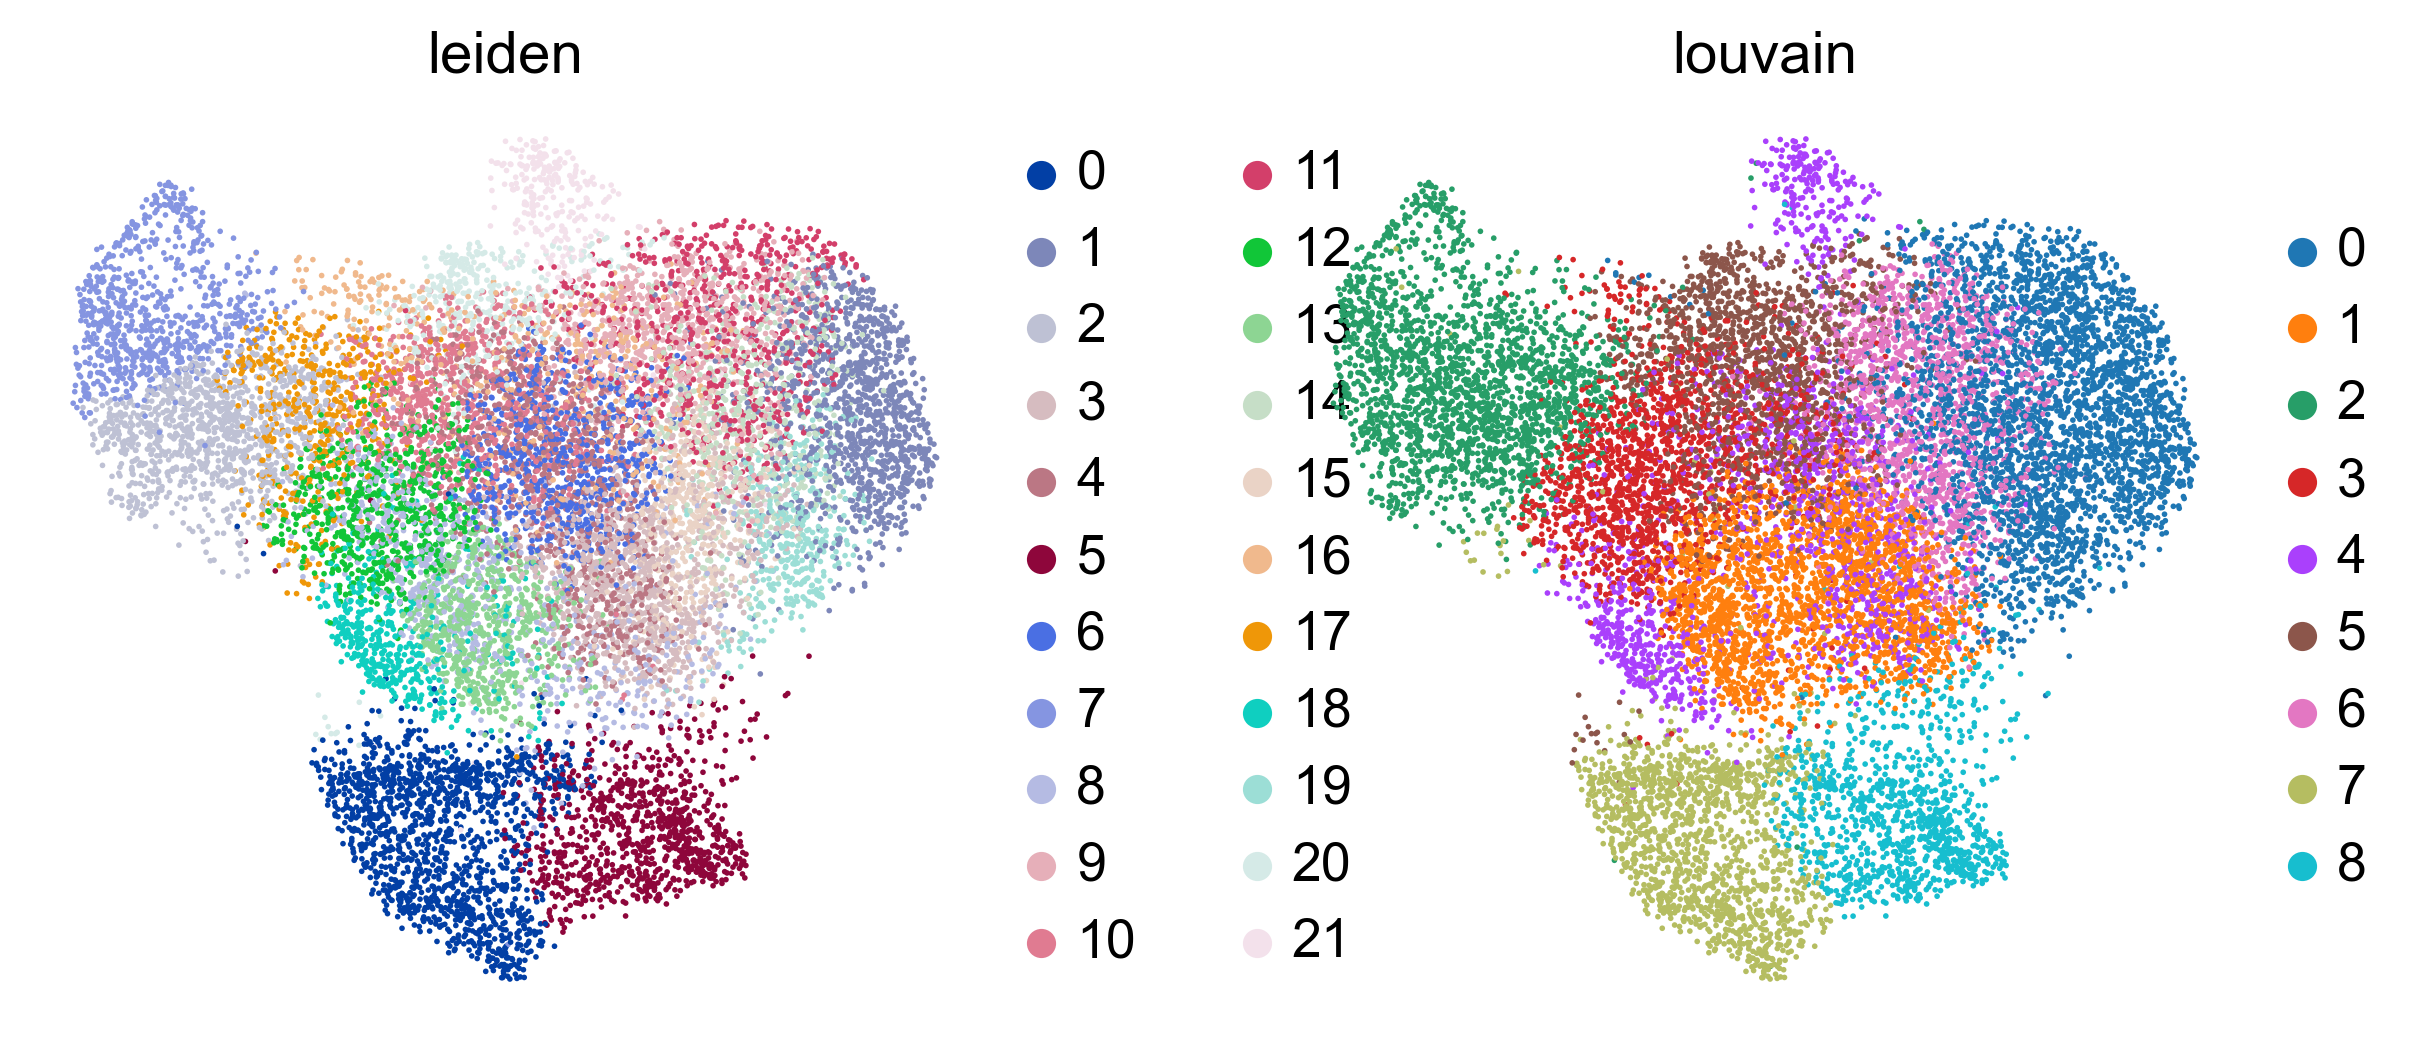

In [18]:
sc.pl.umap(ad, color = ['leiden', 'louvain'])

C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


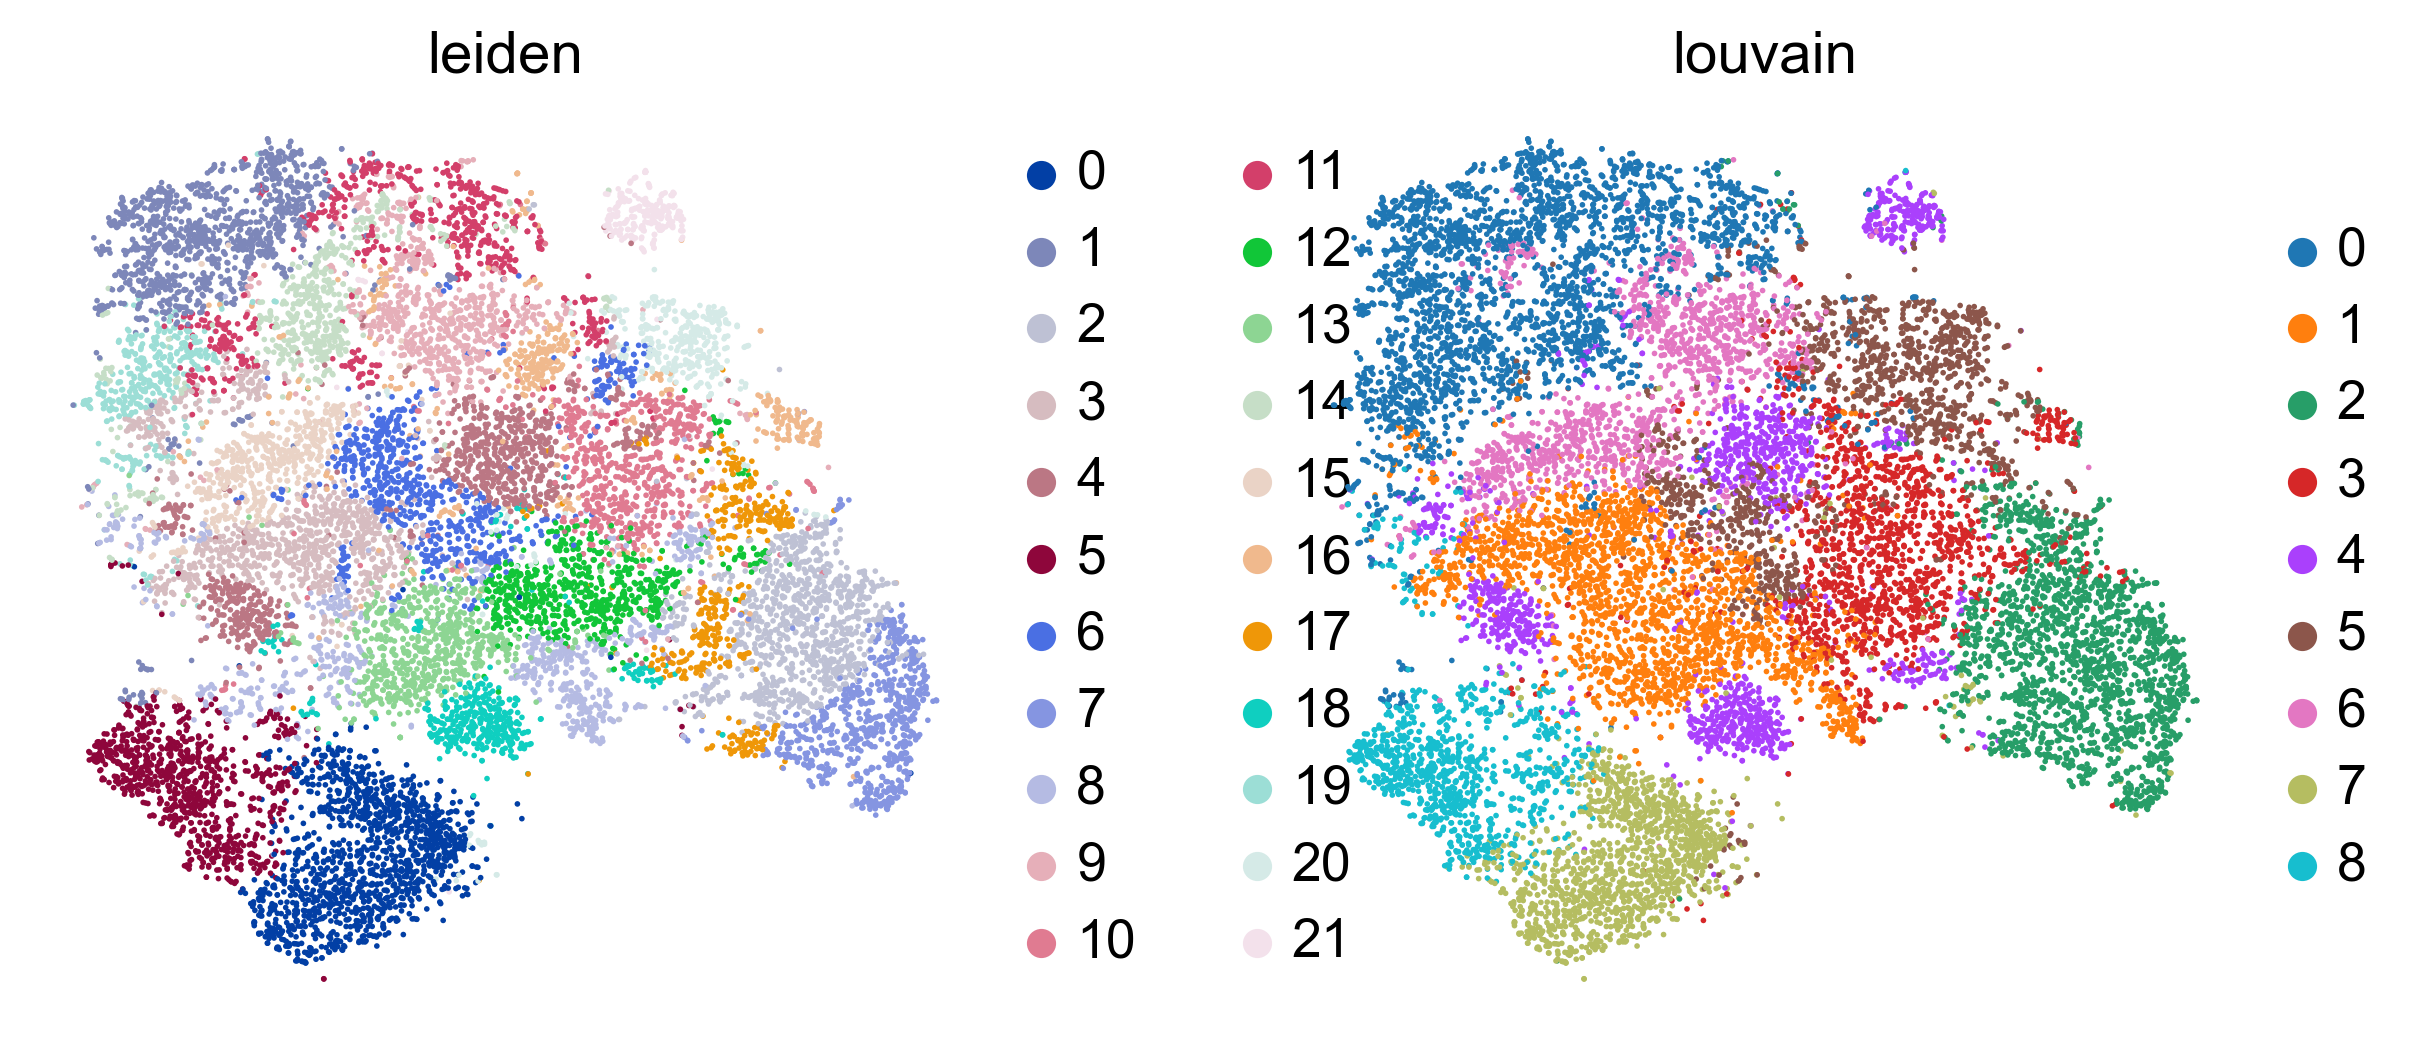

In [19]:
sc.pl.tsne(ad, color = ['leiden', 'louvain'])

In [ ]:
sc.pl.umap(ad, color = ['leiden', 'LGR5', 'ANPEP', 'MUC5AC', 'MUC6', 'MKI67', 'MUC2', 'LYZ', 'STMN1', 'GKN2'])

In [ ]:
sc.pl.tsne(ad, color = ['leiden', 'LGR5', 'STMN1', 'MKI67', 'ANPEP', 'MUC2', 'LYZ', 'MUC6', 'GKN2', 'MUC5AC', 'leiden'])

In [ ]:
palantir.utils.run_magic_imputation(ad)

In [ ]:
sc.pl.embedding(
    ad,
    basis="tsne",
    layer="MAGIC_imputed_data",
    color=['LGR5', 'ANPEP', 'leiden', 'MUC5AC', 'MUC6', 'MKI67', 'MUC2', 'LYZ', 'STMN1', 'GKN2'],
    frameon=False,
)
plt.show()

In [ ]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=['LGR5', 'ANPEP', 'leiden', 'MUC5AC', 'MUC6', 'MKI67', 'MUC2', 'LYZ', 'STMN1', 'GKN2'],
    frameon=False,
)
plt.show()

In [ ]:
palantir.plot.plot_diffusion_components(ad)
plt.show()

In [ ]:
starting_cell = ad[ad[:, 'LGR5'].X > 6.8]
print(starting_cell[:, 'LGR5'].X)

In [ ]:
starting_cell = starting_cell[starting_cell[:, 'LGR5'].X < 7]
print(starting_cell[:, 'LGR5'].X)
start_cell = starting_cell.obs_names

In [ ]:
palantir.plot.highlight_cells_on_umap(ad, start_cell)
plt.show()

In [ ]:
pr_res = palantir.core.run_palantir(data = ad, early_cell = start_cell[0], num_waypoints = 500, scale_components = 1, use_early_cell_as_start = 0)

In [ ]:
palantir.plot.plot_palantir_results(ad)
plt.show()

In [ ]:
adata = ad

from cellrank.kernels import PseudotimeKernel

pk = PseudotimeKernel(adata, time_key="palantir_pseudotime")

In [ ]:
pk.compute_transition_matrix()

In [ ]:
pk.plot_random_walks(
    n_sims = 300,
    linewidth = 0.5,
    start_ixs = {"leiden": "5"},
    basis = "umap",
    size = 25,
)

In [ ]:
from cellrank.estimators import GPCCA

g = GPCCA(pk)
print(g)

In [ ]:
g.fit(n_states = 10, cluster_key = "leiden")

In [ ]:
g.plot_macrostates(which = "all")

In [ ]:
g.predict_terminal_states(method = "stability", n_states = 10)

In [ ]:
g.plot_macrostates(which = "terminal")

In [ ]:
g.predict_initial_states()

In [ ]:
g.plot_macrostates(which = "initial")

In [ ]:
g.compute_fate_probabilities()

In [ ]:
g.plot_fate_probabilities(legend_loc = "right")